## IMPORTING THE LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')

### LOADING THE DATASET

In [2]:
df = pd.read_csv("loans.csv")

### INSPECTING OUR DATA

In [3]:
df.describe()

,id_number,loan_amount,lender_count,funded_amount,repayment_term
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000
mean,1.359770e+06,1499.011464,35.661406,1325.070610,11.803290
std,3.719316e+05,2512.517280,73.420256,2444.726815,9.114948
min,1.377200e+04,50.000000,0.000000,0.000000,3.000000
25%,1.425188e+06,300.000000,7.000000,200.000000,8.000000
50%,1.550673e+06,625.000000,16.000000,525.000000,10.000000
75%,1.566204e+06,1825.000000,41.000000,1525.000000,14.000000
max,1.573593e+06,80000.000000,2665.000000,80000.000000,133.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_number              6019 non-null   int64 
 1   loan_amount            6019 non-null   int64 
 2   lender_count           6019 non-null   int64 
 3   status                 6019 non-null   object
 4   funded_date            5082 non-null   object
 5   funded_amount          6019 non-null   int64 
 6   repayment_term         6019 non-null   int64 
 7   location_country_code  6002 non-null   object
 8   sector                 6019 non-null   object
 9   description            5677 non-null   object
 10  use                    5677 non-null   object
dtypes: int64(5), object(6)
memory usage: 517.4+ KB


In [5]:
df.head()

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
0,736066,4825,60,funded,2014-08-03T17:51:50Z,4825,8,BJ,Retail,NaN,NaN
1,743090,975,34,funded,2014-08-18T09:10:54Z,975,12,BJ,Food,NaN,NaN
2,743120,950,25,funded,2014-08-09T17:46:35Z,950,14,BJ,Services,NaN,NaN
3,743121,825,28,funded,2014-08-24T17:00:38Z,825,14,BJ,Retail,NaN,NaN
4,743124,725,21,funded,2014-08-25T03:24:54Z,725,13,BJ,Retail,NaN,NaN


In [6]:
df.tail(20)

,id_number,loan_amount,lender_count,status,funded_date,funded_amount,repayment_term,location_country_code,sector,description,use
5999,1568794,200,8,funded,2018-07-19T12:39:07Z,200,14,ZW,Food,Mary is an 18-year-old entrepreneur who lives ...,to increase the size and variety of her stock.
6000,1568795,200,8,funded,2018-07-18T21:21:30Z,200,14,ZW,Manufacturing,Rosemary is an 18-year-old entrepreneur who li...,to start her own business manufacturing deterg...
6001,1568806,200,8,funded,2018-07-19T01:41:56Z,200,14,ZW,Agriculture,Sharon is a 17-year-old entrepreneur who lives...,to buy chicks and chick feed.
6002,1568807,200,8,funded,2018-07-18T22:21:38Z,200,14,ZW,Agriculture,Loveness is a 29-year-old entrepreneur who liv...,to start her own business growing crops to sel...
6003,1568825,200,6,funded,2018-07-19T11:54:08Z,200,14,ZW,Clothing,Joyce is a 25-year-old entrepreneur who lives ...,to buy more clothes for her business.
6004,1568826,200,8,funded,2018-07-19T07:20:45Z,200,14,ZW,Agriculture,Shebba is a 22-year-old entrepreneur who lives...,to start her own business of rearing chickens.
6005,1568829,200,8,funded,2018-07-19T02:02:36Z,200,14,ZW,Agriculture,Priscilar is an 18-year-old entrepreneur who l...,to buy chicks and chick feed for her business.
6006,1568834,200,6,funded,2018-07-18T23:00:49Z,200,14,ZW,Agriculture,Delayed is a 19-year-old entrepreneur who live...,to start her own business rearing chickens.
6007,1568835,200,6,funded,2018-07-19T06:24:30Z,200,14,ZW,Agriculture,Matilda is a 20-year-old entrepreneur who live...,to start her own poultry business keeping broi...
6008,1568840,200,7,funded,2018-07-19T02:32:48Z,200,14,ZW,Clothing,Belinda is a 23-year-old entrepreneur who live...,to start her own business selling clothes.


In [7]:
df  = df.drop(['funded_date', 'description', 'use', 'id_number', 'funded_amount'], axis= 1)

In [8]:
status_df = df['status'].unique() 
sort_status = sorted(status_df)
print(sort_status)

['expired', 'funded', 'fundraising']


In [9]:
sector = df['sector'].unique()
sort_sector = sorted(sector)
print(sort_sector)

['Agriculture', 'Arts', 'Clothing', 'Construction', 'Education', 'Food', 'Health', 'Housing', 'Manufacturing', 'Personal Use', 'Retail', 'Services', 'Transportation', 'Wholesale']


In [10]:
location = df['location_country_code'].unique()
print(location)

['BJ' 'BW' 'BF' 'BI' 'CM' 'CG' 'CD' 'EG' 'GH' 'CI' 'KE' 'LS' 'LR' 'MG'
 'MW' 'ML' 'MR' 'MZ' nan 'NG' 'RW' 'SN' 'SL' 'SO' 'ZA' 'SS' 'TZ' 'TG' 'UG'
 'ZM' 'ZW']


In [11]:
df.isnull().sum()

loan_amount               0
lender_count              0
status                    0
repayment_term            0
location_country_code    17
sector                    0
dtype: int64

In [12]:
df = df.fillna(method='ffill')

In [13]:
df.isnull().sum()

loan_amount              0
lender_count             0
status                   0
repayment_term           0
location_country_code    0
sector                   0
dtype: int64

In [14]:
df.shape

(6019, 6)

### EDA

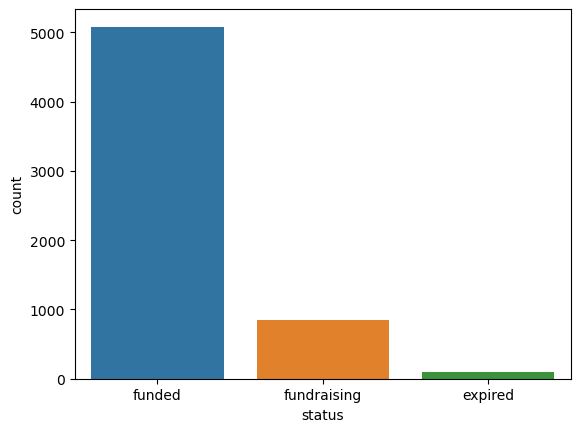

In [15]:
plt = sns.countplot(data=df, x='status')


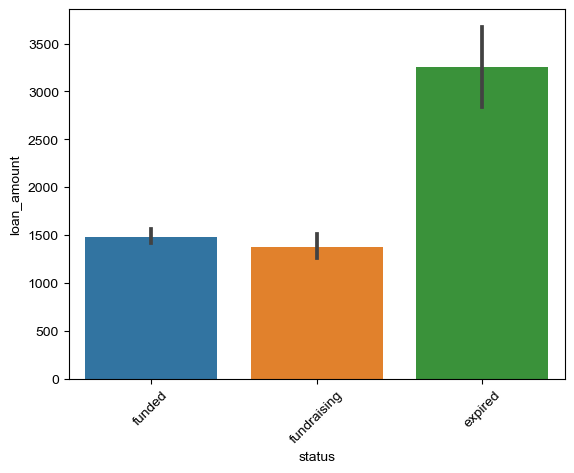

In [16]:
plot = sns.barplot(x='status', y = 'loan_amount', data=df);
# plot.set(title='Total lender_count by sector')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
sns.set(rc={"figure.figsize":(20, 10)})

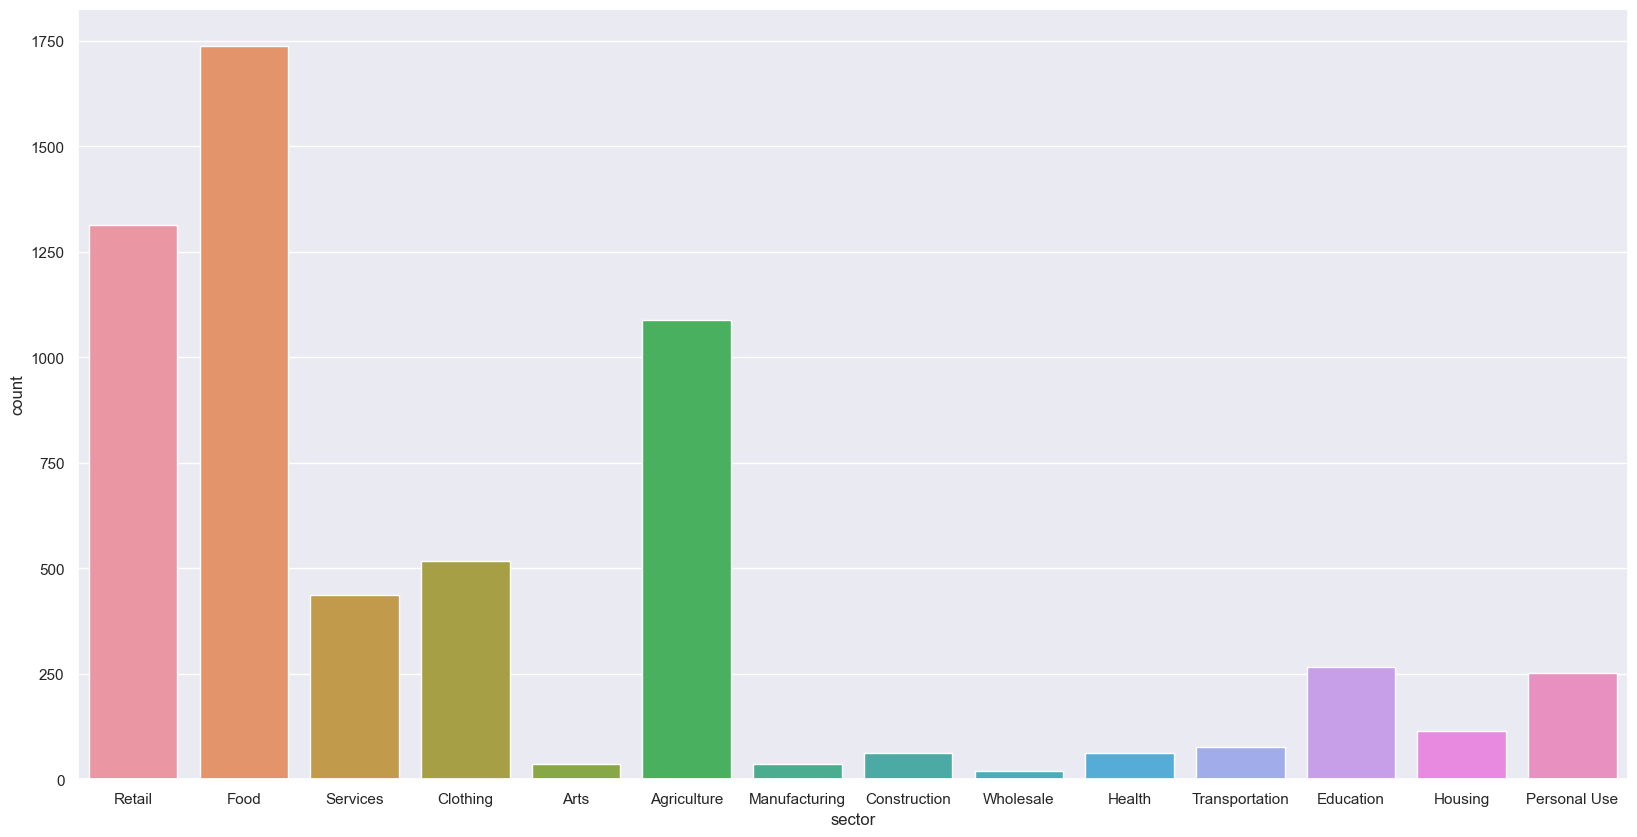

In [17]:
plt = sns.countplot(data=df, x='sector')


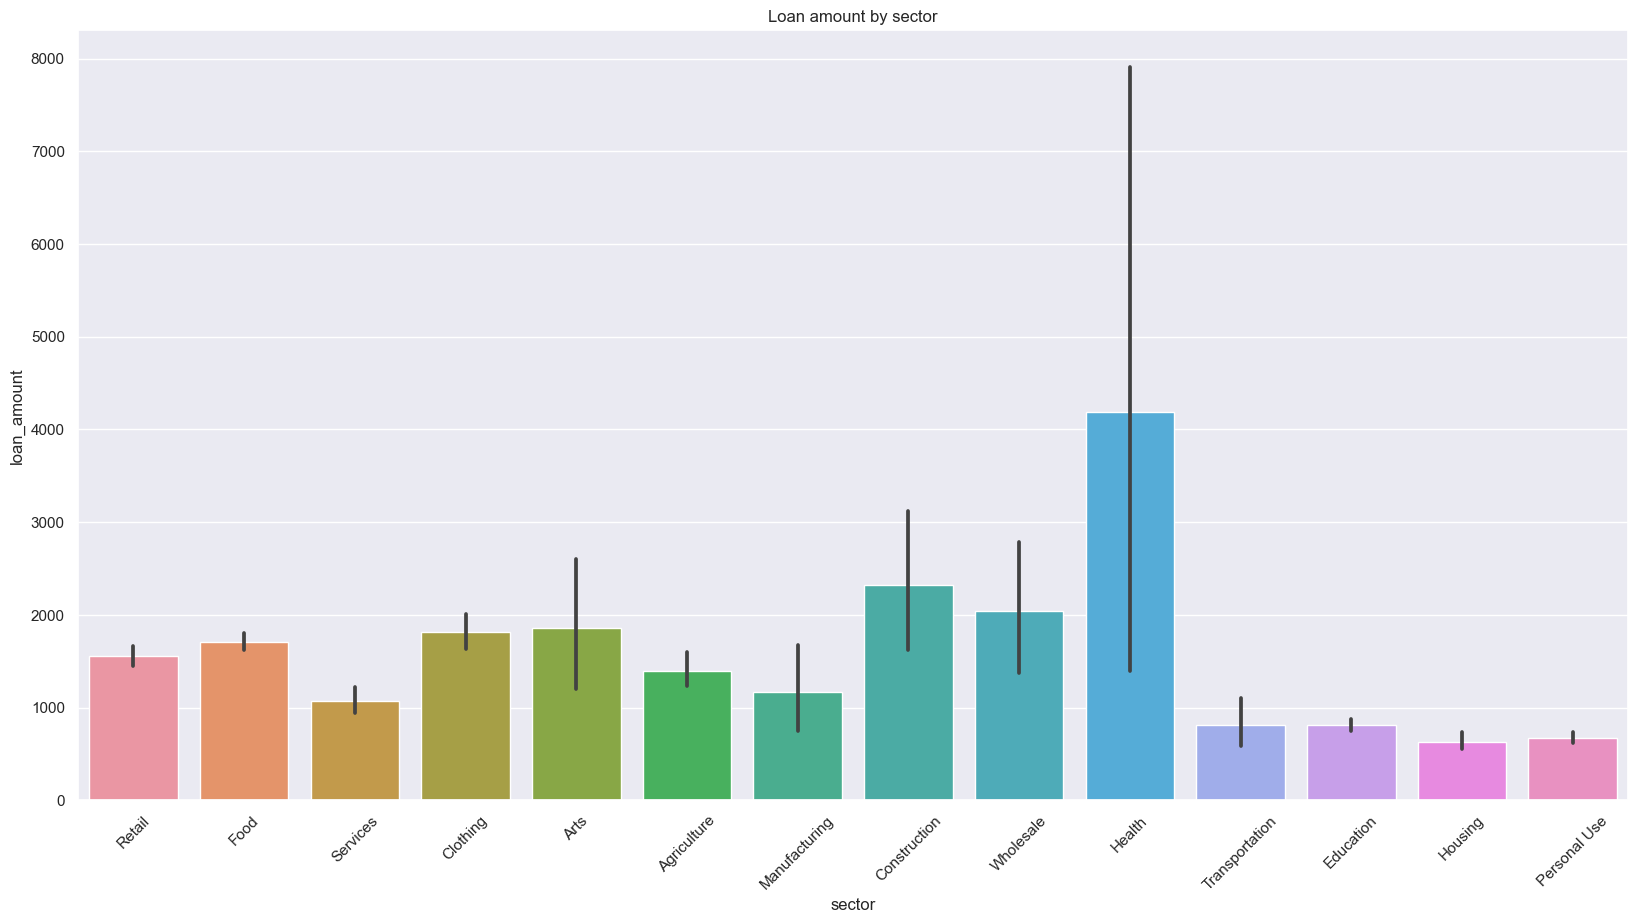

In [18]:
plot = sns.barplot(x='sector', y = 'loan_amount', data=df);
plot.set(title='Loan amount by sector')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
sns.set(rc={"figure.figsize":(20, 10)})

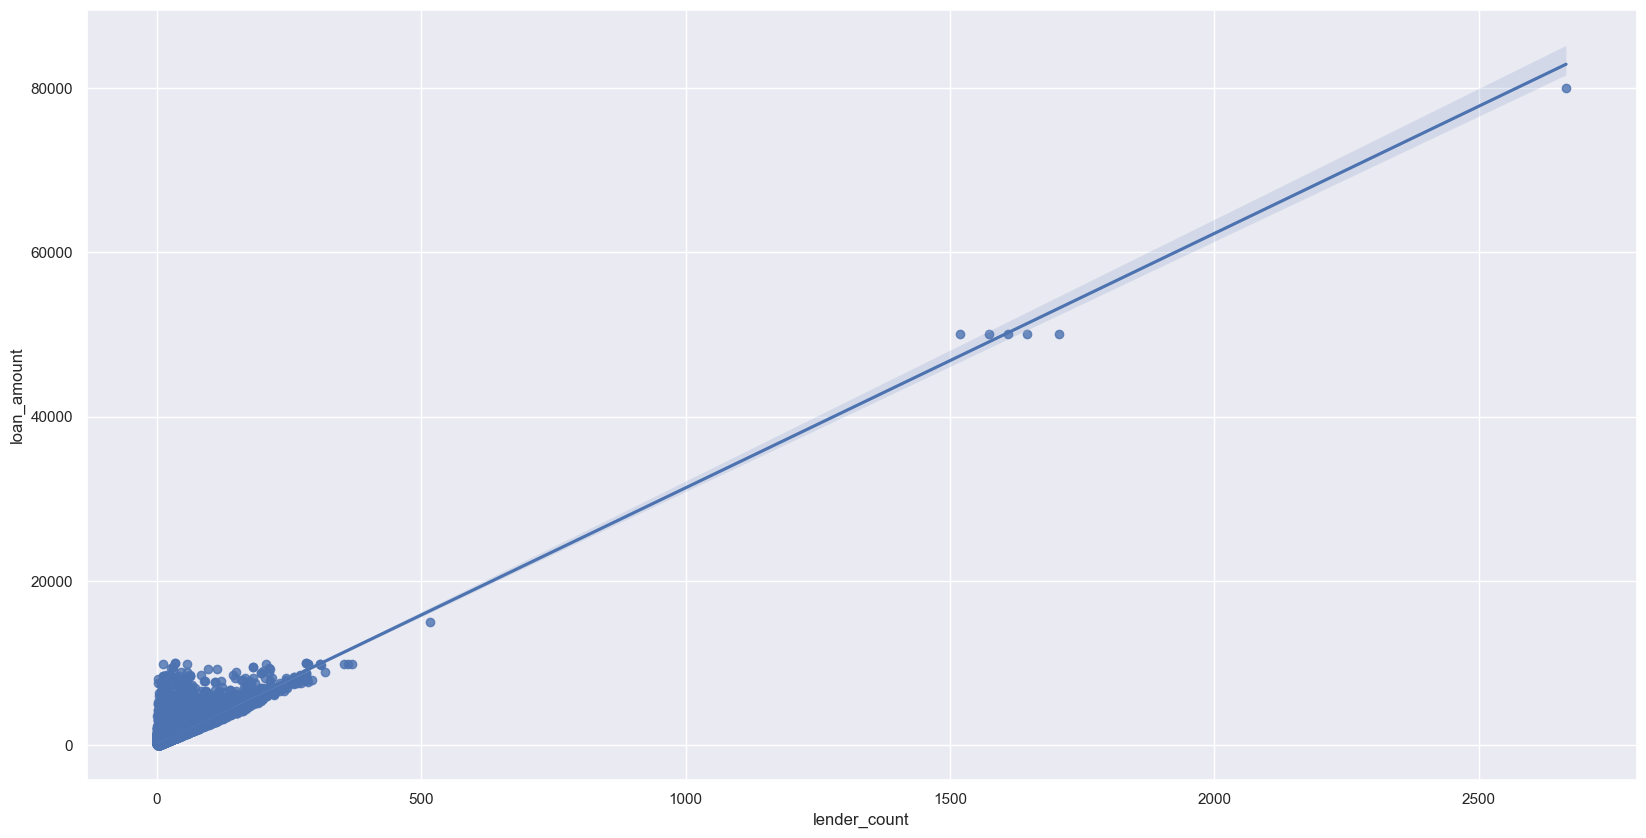

In [19]:
ax = sns.regplot(x='lender_count', y='loan_amount', data=df)


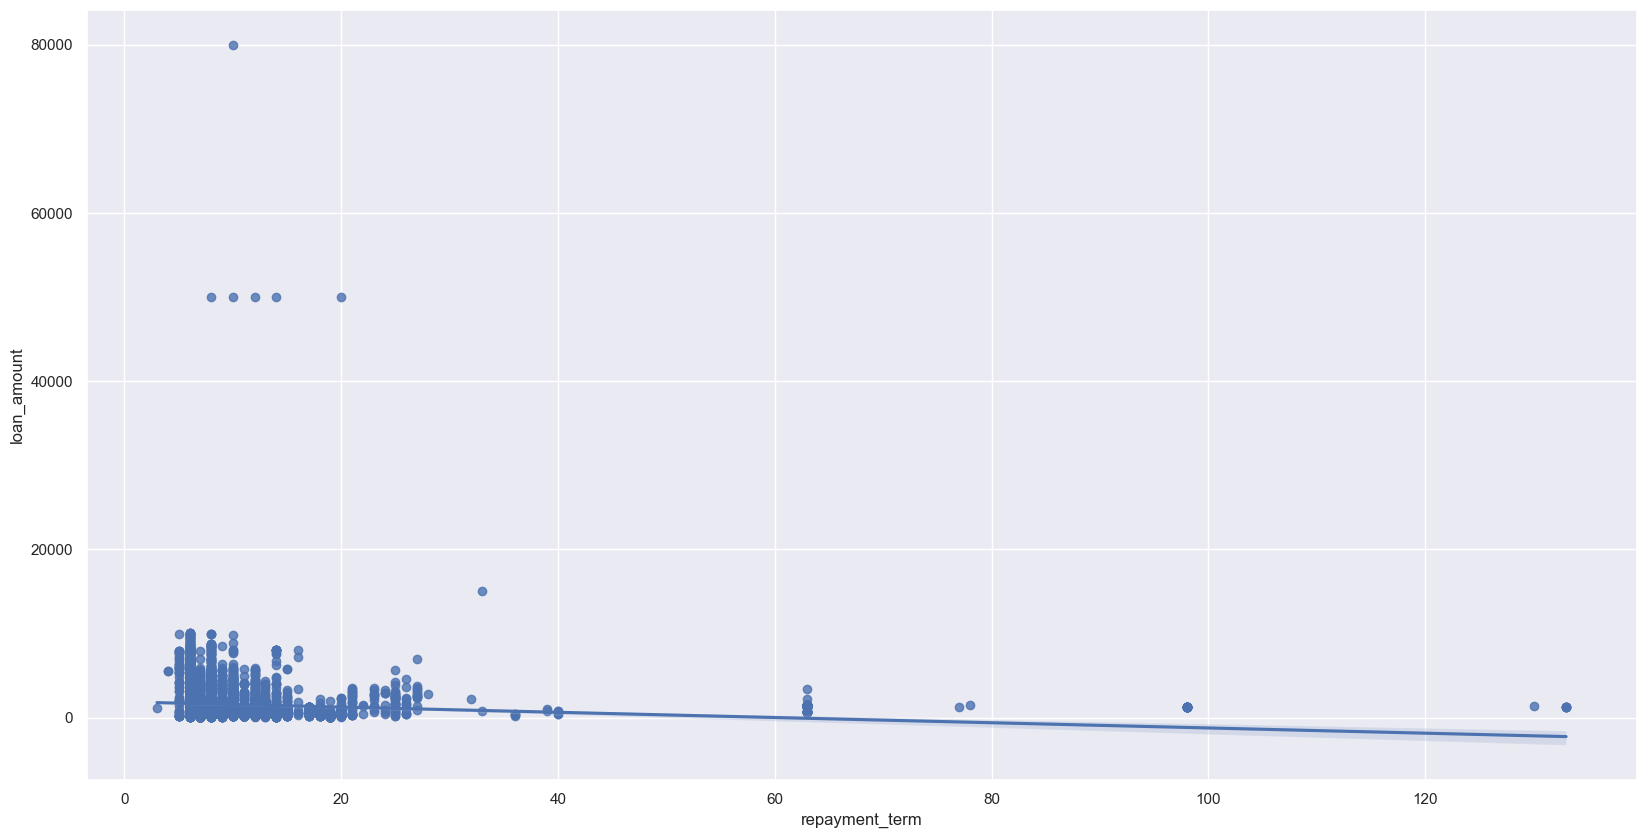

In [20]:
ax = sns.regplot(x='repayment_term', y='loan_amount',data=df)

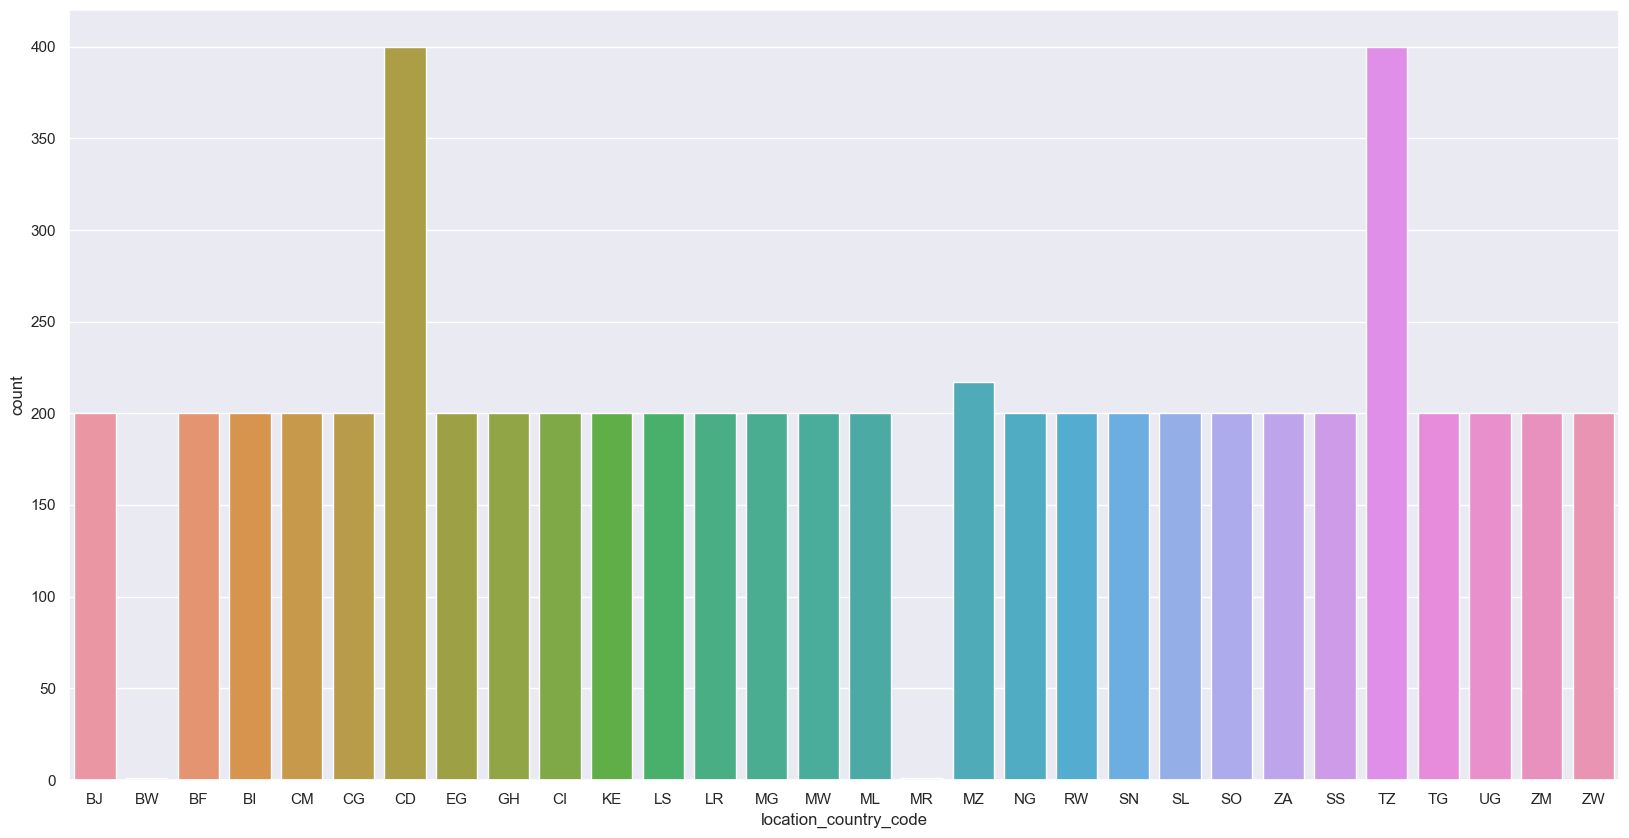

In [21]:
plt = sns.countplot(data=df, x='location_country_code')


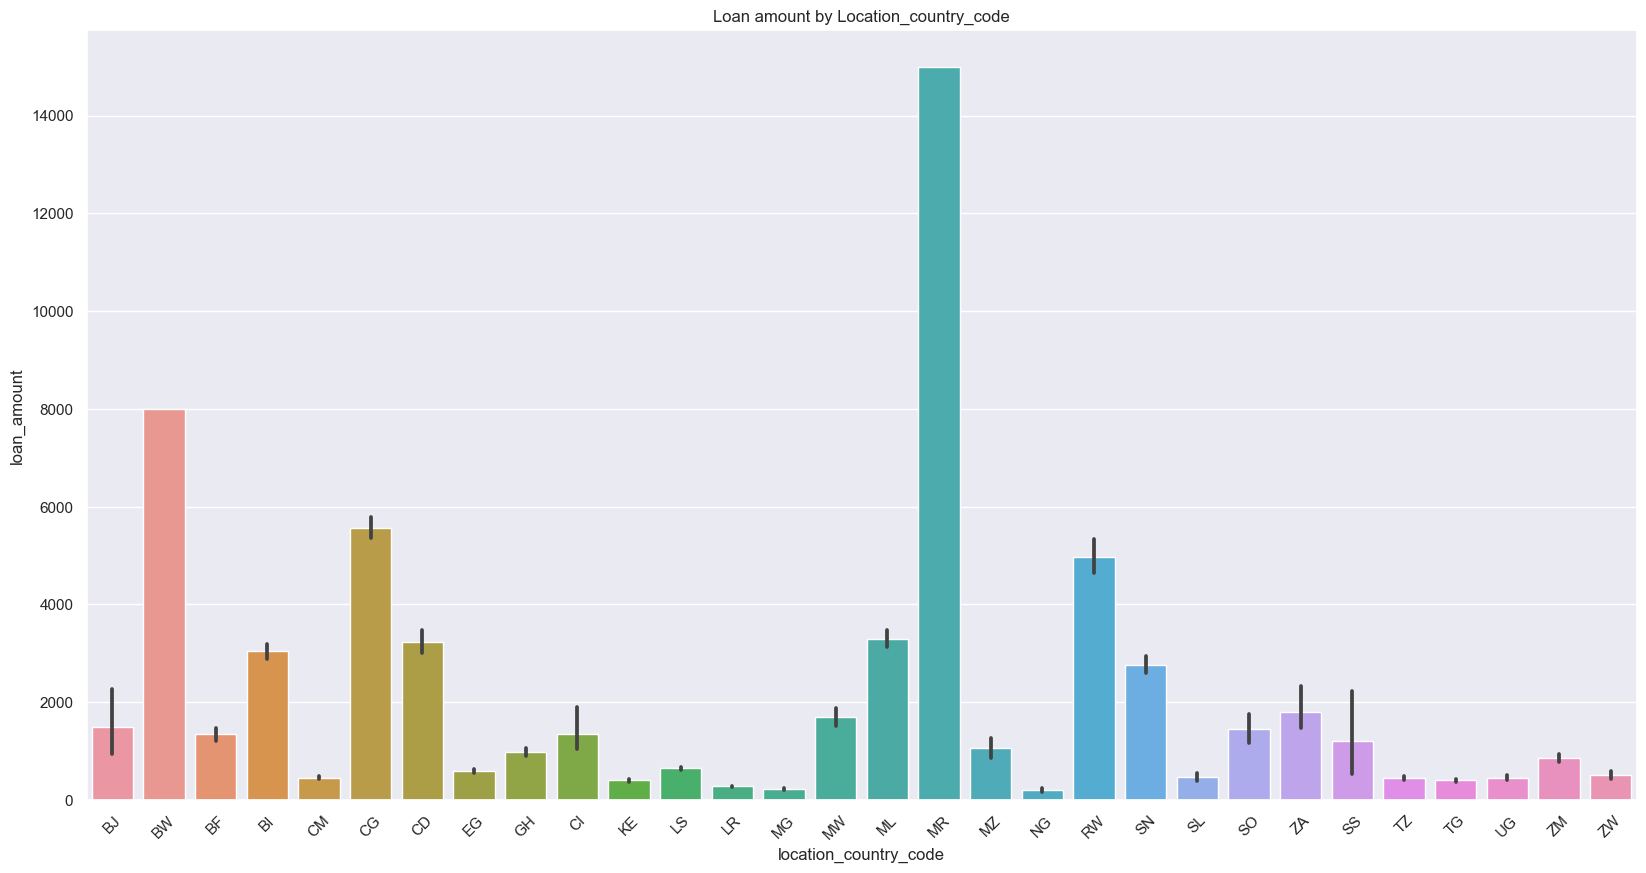

In [22]:
plot = sns.barplot(x='location_country_code', y = 'loan_amount', data=df);
plot.set(title='Loan amount by Location_country_code')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
sns.set(rc={"figure.figsize":(20, 10)})

### ONE HOT ECODING

In [23]:
df = pd.get_dummies(df, columns=['sector', 'status', 'location_country_code'],  drop_first=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_amount               6019 non-null   int64
 1   lender_count              6019 non-null   int64
 2   repayment_term            6019 non-null   int64
 3   sector_Arts               6019 non-null   uint8
 4   sector_Clothing           6019 non-null   uint8
 5   sector_Construction       6019 non-null   uint8
 6   sector_Education          6019 non-null   uint8
 7   sector_Food               6019 non-null   uint8
 8   sector_Health             6019 non-null   uint8
 9   sector_Housing            6019 non-null   uint8
 10  sector_Manufacturing      6019 non-null   uint8
 11  sector_Personal Use       6019 non-null   uint8
 12  sector_Retail             6019 non-null   uint8
 13  sector_Services           6019 non-null   uint8
 14  sector_Transportation     6019 non-null 

In [25]:
df.head()

,loan_amount,lender_count,repayment_term,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Food,sector_Health,sector_Housing,...,location_country_code_SL,location_country_code_SN,location_country_code_SO,location_country_code_SS,location_country_code_TG,location_country_code_TZ,location_country_code_UG,location_country_code_ZA,location_country_code_ZM,location_country_code_ZW
0,4825,60,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,975,34,12,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,950,25,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,825,28,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,725,21,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### SPLITTING THE DATA INTO TRAINING, TESTING AND VALIDATING DATA

In [26]:
# Step 1: Split the data into training and temporary data (70% for training, 30% for temporary)
training_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)

# Step 2: Split the temporary data into testing and validation data (10% for testing, 20% for validation)
testing_data, validation_data = train_test_split(temp_data, test_size=0.67, random_state=42)

# Step 3: Print the sizes of the three datasets
print("Training data size:", len(training_data))
print("Testing data size:", len(testing_data))
print("Validation data size:", len(validation_data))


Training data size: 4213
Testing data size: 595
Validation data size: 1211


In [27]:
# training_data, testing_data, and validation_data are the datasets obtained from the previous step.

# Step 1: Separate features (X) and target variable (y) for each dataset
X_train = training_data.drop(columns=['loan_amount'])
y_train = training_data['loan_amount']

X_test = testing_data.drop(columns=['loan_amount'])
y_test = testing_data['loan_amount']

X_val = validation_data.drop(columns=['loan_amount'])
y_val = validation_data['loan_amount']


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LogisticRegression()

In [30]:
# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance (e.g., accuracy)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing data:", accuracy)


Accuracy on testing data: 0.12436974789915967


In [32]:
from sklearn.metrics import confusion_matrix

# Step 1: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Print the confusion matrix
print("Confusion Matrix:")
print(cm)
# Checking the accuracy of the model
model.score(X_test,y_test)


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


0.13781512605042018

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.07226890756302522


### Naive Bayes model

In [34]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [35]:
y_pred = nb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Checking the accuracy of the model
nb_model.score(X_test,y_test)

0.040336134453781515

In [49]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.07226890756302522
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Support vector machine

In [39]:
from sklearn.svm import SVC
s_model = SVC()
s_model = s_model.fit(X_train, y_train)

In [41]:
y_pred = s_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Checking the accuracy of the model
s_model.score(X_test,y_test)

0.14285714285714285

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

### Linear Regression

In [44]:
# importing the linear Regression model
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)

LinearRegression()

In [48]:
predictions= LinearModel.predict(X_test)

In [46]:
# Checking the accuracy of the model
LinearModel.score(X_test,y_test)

0.9076740718859425

### Making a pickel of the LinearRegression

In [47]:
# Save the trained model to a pickle file
with open('creavins.pkl', 'wb') as f:
    pickle.dump(LinearModel, f)